## Data procurement

In [79]:
# Importing necessary libraries
import numpy as np
import pandas as pd

In [80]:
# Loading the data
fake = pd.read_csv("D:\Projects\Fake-News-Detector\Fake.csv")
true = pd.read_csv("D:\Projects\Fake-News-Detector\True.csv")

In [81]:
# Checking how the fake data looks like
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [82]:
# Checking different subjects and their counts for fake data
fake["subject"].value_counts()

subject
News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: count, dtype: int64

In [83]:
# Checking how the true data looks like
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [84]:
# Checking different subjects and their counts for true data
true["subject"].value_counts()

subject
politicsNews    11272
worldnews       10145
Name: count, dtype: int64

In [85]:
# Creating a category column to determine whether the news is fake or not
fake["category"] = 0
true["category"] = 1

In [86]:
# Joining the 2 datasets together and resetting the indices
df = pd.concat([fake, true]).reset_index(drop = True)

# Checking the data
df.head()
# df.tail()

,title,text,subject,date,category
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


## Data visualization

In [87]:
# Importing necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\Asus\AppData\Local\Temp\ipykernel_22532\171533293.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="category", palette = ["red", "green"])


<Axes: xlabel='category', ylabel='count'>

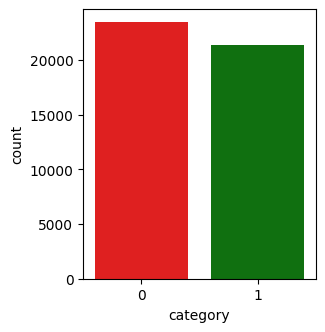

In [88]:
# Making a basic countplot of the number of fake and true news
plt.figure(figsize = (3, 3.5))
sns.countplot(data=df, x="category", palette = ["red", "green"])

C:\Users\Asus\AppData\Local\Temp\ipykernel_22532\2362688050.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="subject", palette="Set1")


<Axes: xlabel='subject', ylabel='count'>

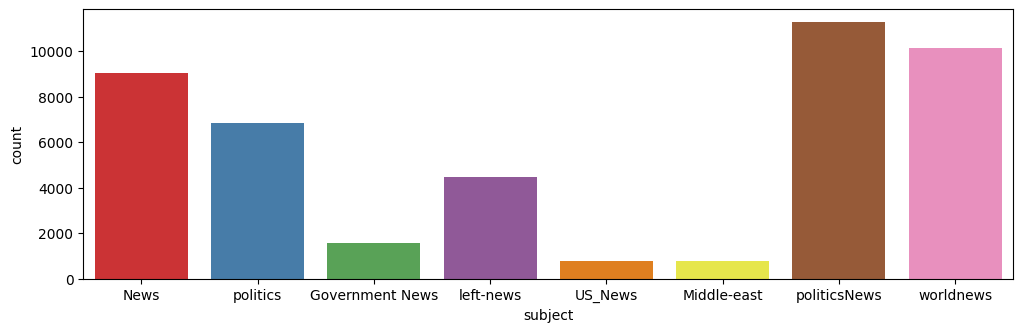

In [89]:
# Making a basic countplot of the number of different subject of news
plt.figure(figsize = (12, 3.5))
sns.countplot(data=df, x="subject", palette="Set1")

# Data Cleanup

In [90]:
# # Downloading necessary files
# import nltk
# nltk.download('stopwords')
# nltk.download('wordnet')

In [91]:
# Importing necessary libraries
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import spacy
import re
nlp = spacy.load("en_core_web_sm")
lemma = WordNetLemmatizer()

In [92]:
# Dropping all unneccessary columns in the dataset
df = df[["text", "category"]]
df.head()

,text,category
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


In [93]:
# Checking the percentage of data that is null or is empty space
print(df.isna().sum()*100/len(df))

blanks = []
for index, text in df["text"].items():
    if text.isspace():
        blanks.append(index)
print("\nEmpty spaces: ", len(blanks))
print(blanks)

# df.text[10923]

text        0.0
category    0.0
dtype: float64

Empty spaces:  631
[10923, 11041, 11190, 11225, 11236, 11241, 11247, 11249, 11267, 11268, 11283, 11284, 11285, 11289, 11290, 11292, 11295, 11296, 11301, 11303, 11304, 11305, 11309, 11314, 11317, 11319, 11322, 11330, 11334, 11335, 11340, 11343, 11348, 11351, 11352, 11357, 11371, 11373, 11374, 11382, 11397, 11402, 11403, 11409, 11410, 11412, 11415, 11419, 11421, 11427, 11431, 11432, 11440, 11448, 11450, 11453, 11462, 11464, 11465, 11472, 11473, 11475, 11478, 11489, 11491, 11493, 11494, 11501, 11505, 11507, 11520, 11531, 11532, 11533, 11538, 11542, 11547, 11549, 11551, 11559, 11563, 11581, 11585, 11589, 11590, 11614, 11624, 11625, 11627, 11631, 11636, 11637, 11643, 11650, 11658, 11661, 11672, 11679, 11681, 11684, 11686, 11688, 11692, 11708, 11718, 11729, 11739, 11753, 11765, 11768, 11777, 11782, 11786, 11788, 11792, 11793, 11803, 11806, 11813, 11821, 11831, 11832, 11841, 11844, 11848, 11854, 11858, 11860, 11863, 11866, 11872, 11874, 11875, 1

In [94]:
# Dropping all the empty spaces from the dataset
print("Original shape of the dataframe (before dropping empty spaces): ", df.shape)
df = df.drop(blanks)
print("New shape of the dataframe (after dropping empty spaces): ", df.shape)

Original shape of the dataframe (before dropping empty spaces):  (44898, 2)
New shape of the dataframe (after dropping empty spaces):  (44267, 2)


Stopwords:

A stop word is commonly used word (such as "the", "a", "an", "in" etc.) that a search engine has been programmed to ignore, both when indexing entries for searching and when retrieving them as a result of a search query. We would not want these words to take up space in our database, or taking up valuable processing time. For this, we can remove them easily, by storing a list of words that you consider to be stop words. NLTK (Natural Language ToolKit) in python has a list of stopwords stored in 16 different languages. You can find them in the nltk_data directory.

In [95]:
# Collecting stopwords from both spacy and nltk and combining them
list1 = nlp.Defaults.stop_words
list2 = stopwords.words('english')

Stopwords = set((set(list1) | set(list2)))
print(len(Stopwords))
print(Stopwords)

401
{'y', 'besides', 'seemed', 'do', 'elsewhere', 'who', "i'll", 'have', 'itself', 'almost', 'any', 'most', 'then', 'him', 'less', 'otherwise', 'anywhere', 'off', 'down', 'was', 'an', 'has', 'hereupon', 'there', 'mightn', 'here', 'various', 'due', 'again', 'beyond', '‘m', 'would', "isn't", '‘ve', 'much', 'been', 'sometimes', 'one', 'our', 'me', 'twenty', 'via', 'theirs', 'had', 'these', 'why', 'even', "should've", 'since', "shan't", '’s', 'wasn', 'moreover', 'amongst', 'o', 'within', 'well', 'fifteen', '’ll', "hasn't", "it'd", 'several', 'weren', 'i', 'except', 'yourself', 'before', 'myself', 'now', 'doing', 'does', 'empty', 'for', 'up', 'shouldn', "'s", 'about', '’re', 'd', 'could', 'having', 'whereafter', 'yet', 'but', 'thereupon', "she's", 'although', 'is', 'show', 'someone', 'serious', 'first', 'all', 'whither', 'couldn', 'haven', 'mustn', "it'll", "i'm", 'am', 'shan', 'perhaps', 'can', 'front', 'or', 'meanwhile', 'those', 'hasn', "'re", 'by', 'too', 'its', "she'd", 'just', 'across

In [96]:
# Defining a custom function for cleaning the text further
def clean_text(text):
    string = ""

    # Convert the text to lower case
    text = text.lower()

    # Simplify text
    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"he's", "he is", text)
    text = re.sub(r"she's", "she is", text)
    text = re.sub(r"that's", "that is", text)
    text = re.sub(r"what's", "what is", text)
    text = re.sub(r"where's", "where is", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"can't", "could not", text)
    text = re.sub(r"\'ll", "will", text)
    text = re.sub(r"\'ve", "have", text)
    text = re.sub(r"\'re", "are", text)
    text = re.sub(r"\'d", "would", text)

    # Removing any special character
    text = re.sub(r"[-()\"#!@$%^&*{}?.,:]", " ", text)
    text = re.sub(r"\s+", " ", text)
    text = re.sub("[^A-Za-z0-9]+", " ", text)

    for word in text.split():
        if word not in Stopwords:
            string += lemma.lemmatize(word) + " "

    return string

In [97]:
# Applying the clean_text function on every news text in the dataset
df["text"] = df["text"].apply(clean_text)
df["text"]

0        donald trump wish american happy new year leav...
1        house intelligence committee chairman devin nu...
2        friday revealed milwaukee sheriff david clarke...
3        christmas day donald trump announced work foll...
4        pope francis annual christmas day message rebu...
                               ...                        
44893    brussels reuters nato ally tuesday welcomed pr...
44894    london reuters lexisnexis provider legal regul...
44895    minsk reuters shadow disused soviet era factor...
44896    moscow reuters vatican secretary state cardina...
44897    jakarta reuters indonesia buy 11 sukhoi fighte...
Name: text, Length: 44267, dtype: object

## Word Cloud

In [98]:
# Importing necessary libraries
from wordcloud import WordCloud
from PIL import Image

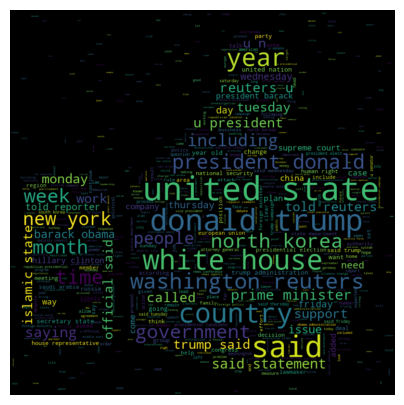

In [99]:
# True News
thumb = "D:\Projects\Fake-News-Detector\Thumbs up.png"
icon = Image.open(thumb)
mask = Image.new(mode="RGB", size=icon.size, color=(255, 255, 255))
mask.paste(icon, box=icon)

rgb_array = np.array(mask)

plt.figure(figsize = (5, 5))
Wc = WordCloud(mask=rgb_array, max_words=2000, width=1600, height=800)
Wc.generate(" ".join(df[df.category == 1].text))
plt.axis("off")
plt.imshow(Wc, interpolation='bilinear')

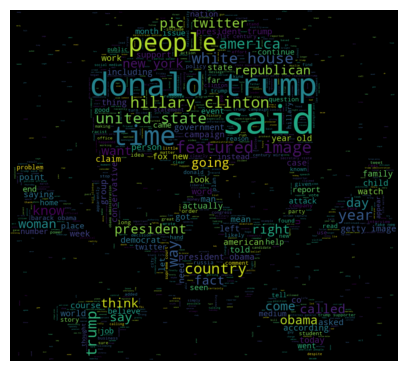

In [100]:
# Fake News
danger = "D:\Projects\Fake-News-Detector\Danger sign.png"
icon = Image.open(danger).convert("RGBA")
mask = Image.new(mode="RGBA", size=icon.size, color=(255, 255, 255, 255))
mask.paste(icon, (0, 0), mask=icon)

rgb_array = np.array(mask)

plt.figure(figsize = (5, 5))
Wc = WordCloud(mask=rgb_array, max_words=2000, width=1600, height=800)
Wc.generate(" ".join(df[df.category == 0].text))
plt.axis("off")
plt.imshow(Wc, interpolation='bilinear')

## Classifier Model

In [101]:
# Import neccessary libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn import metrics

In [102]:
# Divide the dataset into train and test data
x = df["text"]
y = df["category"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [103]:
# # TFIDF vectorizer
# vectorizer = TfidfVectorizer()
# x_train_tfidf = vectorizer.fit_transform(x_train)

# x_train_tfidf

In [104]:
# # Fitting the data
# clf = LinearSVC()
# clf.fit(x_train_tfidf, y_train)

In [105]:
# Creating pipeline to vectorize and fit the data
text_clf = Pipeline([("tfidf", TfidfVectorizer()), ("clf", LinearSVC())])

In [106]:
# Training the model
text_clf.fit(x_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [107]:
# Using the pipeline and the trained model to predict on the test data
predictions = text_clf.predict(x_test)

In [120]:
# Printing the accuracy score
print(metrics.accuracy_score(y_test, predictions), "\n\n")

# Building a confusion matrix
print(np.array([["True reals", "False reals"], ["False fakes", "True fakes"]]))
print()
print(metrics.confusion_matrix(y_test, predictions))

0.994277539341917 


[['True reals' 'False reals']
 ['False fakes' 'True fakes']]

[[6854   42]
 [  34 6351]]


In [113]:
news = input("Enter the news text: ")
print("News: ", news)
new_prediction = text_clf.predict([news])

if new_prediction[0] == 0:
    print("\nThe news is Fake.")
else:
    print("\nThe news is Real.")

News:  The Earth is flat.

The news is Fake.
